In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy

In [22]:
import tensorflow as tf 
hello = tf.constant('Hello, TensorFlow!') #The tf command creates a constant tensor from a 
#tensor-like object; in this case, the object is "Hello, TensorFlow!", a string
print(hello) 

tf.Tensor(b'Hello, TensorFlow!', shape=(), dtype=string)


In [23]:
mnist = tf.keras.datasets.mnist   
 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

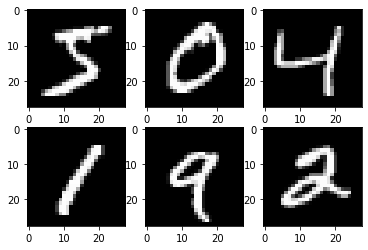

In [24]:
import matplotlib.pyplot as plt #Q1
# plot 6 images as gray scale
plt.subplot(231)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(232)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(233)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(234)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(235)
plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(236)
plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [25]:
# normalize inputs from 0-255 to 0-1 #Q2
X_train = X_train / 255
X_test = X_test / 255

In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10)]) 

In [28]:
predictions= model(X_train[:1]).numpy() 
predictions 


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



array([[-0.4089361 ,  0.95762235, -0.66349655,  0.01570633, -0.7654899 ,
         0.0841923 , -0.21714455,  0.9631841 ,  1.0250152 , -0.5181577 ]],
      dtype=float32)

In [29]:
tf.nn.sigmoid(predictions).numpy() 


array([[0.39916724, 0.7226455 , 0.33995458, 0.5039265 , 0.31745556,
        0.5210356 , 0.44592616, 0.7237588 , 0.7359484 , 0.37328312]],
      dtype=float32)

In [30]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 

In [32]:
loss_fn(y_train[:1], predictions).numpy() 


2.4930859

In [31]:
model.compile(optimizer='SGD', loss=loss_fn, metrics=['accuracy']) 

model.fit(X_train, y_train, epochs=5)
 

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 28us/sample - loss: 1.4640 - accuracy: 0.6951
Epoch 2/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.7053 - accuracy: 0.8500
Epoch 3/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.5226 - accuracy: 0.8727
Epoch 4/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4472 - accuracy: 0.8839
Epoch 5/5
60000/60000 [==============================] - 2s 27us/sample - loss: 0.4055 - accuracy: 0.8911


In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10)]) 

In [11]:
model.compile(optimizer='SGD',               
              loss=loss_fn,               
              metrics=['accuracy']) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10) 
model.evaluate(X_test, y_test, verbose=2) #Q3: The accuracy remained around the same going
#from 89% to 88.9%
 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 38us/sample - loss: 2.2245 - accuracy: 0.2839 - val_loss: 2.1192 - val_accuracy: 0.5333
Epoch 2/10
48000/48000 [==============================] - 2s 35us/sample - loss: 1.9064 - accuracy: 0.5705 - val_loss: 1.6140 - val_accuracy: 0.6749
Epoch 3/10
48000/48000 [==============================] - 2s 34us/sample - loss: 1.3363 - accuracy: 0.6974 - val_loss: 1.0698 - val_accuracy: 0.7731
Epoch 4/10
48000/48000 [==============================] - 2s 38us/sample - loss: 0.9424 - accuracy: 0.7685 - val_loss: 0.7907 - val_accuracy: 0.8116
Epoch 5/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.7396 - accuracy: 0.8091 - val_loss: 0.6404 - val_accuracy: 0.8393
Epoch 6/10
48000/48000 [==============================] - 2s 34us/sample - loss: 0.6217 - accuracy: 0.8345 - val_loss: 0.5513 - val_accuracy: 0.8581
Epoch 7/10
48000/48000 [==============================] 

[0.39713696253299713, 0.8885]

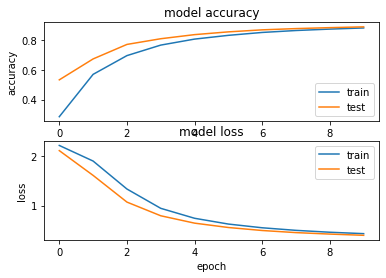

In [12]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
 
plt.show()

In [33]:
model = tf.keras.models.Sequential([   
    tf.keras.layers.Flatten(input_shape=(28, 28)),   
    tf.keras.layers.Dense(128, activation='sigmoid'),   
    tf.keras.layers.Dense(128, activation='sigmoid'),   
    tf.keras.layers.Dropout(0.2),     
    tf.keras.layers.Dense(10)]) 
 

In [34]:
model.compile(optimizer='SGD',               
              loss=loss_fn,               
              metrics=['accuracy']) 
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=200) 
model.evaluate(X_test, y_test, verbose=2)  #Q4: Increased batch size leads to increase in
#speed and less in accuracy 

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 17us/sample - loss: 2.3620 - accuracy: 0.1075 - val_loss: 2.2765 - val_accuracy: 0.1206
Epoch 2/10
48000/48000 [==============================] - 1s 13us/sample - loss: 2.3164 - accuracy: 0.1224 - val_loss: 2.2536 - val_accuracy: 0.2214
Epoch 3/10
48000/48000 [==============================] - 1s 13us/sample - loss: 2.2887 - accuracy: 0.1384 - val_loss: 2.2294 - val_accuracy: 0.3029
Epoch 4/10
48000/48000 [==============================] - 1s 13us/sample - loss: 2.2639 - accuracy: 0.1599 - val_loss: 2.2028 - val_accuracy: 0.3881
Epoch 5/10
48000/48000 [==============================] - 1s 13us/sample - loss: 2.2312 - accuracy: 0.1858 - val_loss: 2.1725 - val_accuracy: 0.4882
Epoch 6/10
48000/48000 [==============================] - 1s 14us/sample - loss: 2.1999 - accuracy: 0.2162 - val_loss: 2.1360 - val_accuracy: 0.5486
Epoch 7/10
48000/48000 [==============================] 

[1.9013180721282958, 0.6301]

In [35]:
import pandas as pd #Pima Indians Dataset/Diabetes
import numpy as np
file = 'pima-indians-diabetes.csv' 
dataframe = pd.read_csv(file) 
dataframe.head() 
 

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [36]:
dataframe.describe()

,ID,preg_no,plasma,diastolic,triceps,serum,mass,pedigree,age,diabete
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
y = dataframe['diabete'] 
X = dataframe.drop(['ID','diabete'], axis=1) 

In [38]:
from sklearn.model_selection import train_test_split 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234) 

In [48]:
model = Sequential() #Q5
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Train on 768 samples
Epoch 1/150
768/768 [==============================] - 0s 373us/sample - loss: 1.0554 - accuracy: 0.6315
Epoch 2/150
768/768 [==============================] - 0s 91us/sample - loss: 0.7461 - accuracy: 0.6536
Epoch 3/150
768/768 [==============================] - 0s 83us/sample - loss: 0.7055 - accuracy: 0.6497
Epoch 4/150
768/768 [==============================] - 0s 87us/sample - loss: 0.6679 - accuracy: 0.6576
Epoch 5/150
768/768 [==============================] - 0s 90us/sample - loss: 0.6498 - accuracy: 0.6706
Epoch 6/150
768/768 [==============================] - 0s 86us/sample - loss: 0.6559 - accuracy: 0.6758
Epoch 7/150
768/768 [==============================] - 0s 84us/sample - loss: 0.6411 - accuracy: 0.6862
Epoch 8/150
768/768 [==============================] - 0s 84us/sample - loss: 0.6373 - accuracy: 0.6823
Epoch 9/150
768/768 [==============================] - 0s 80us/sample - loss: 0.6276 - accuracy: 0.6823
Epoch 10/150
768/768 [====================

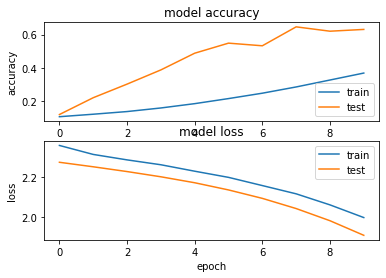

In [62]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
 
plt.show()

In [72]:
from tensorflow.keras.layers import Dropout

In [75]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [76]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)

Train on 768 samples
Epoch 1/150
768/768 [==============================] - 0s 383us/sample - loss: 27.6711 - accuracy: 0.4154
Epoch 2/150
768/768 [==============================] - 0s 86us/sample - loss: 9.3899 - accuracy: 0.5013
Epoch 3/150
768/768 [==============================] - 0s 84us/sample - loss: 3.2768 - accuracy: 0.5508
Epoch 4/150
768/768 [==============================] - 0s 87us/sample - loss: 1.7233 - accuracy: 0.5911
Epoch 5/150
768/768 [==============================] - 0s 84us/sample - loss: 1.3566 - accuracy: 0.6198
Epoch 6/150
768/768 [==============================] - 0s 87us/sample - loss: 1.0645 - accuracy: 0.6380
Epoch 7/150
768/768 [==============================] - 0s 86us/sample - loss: 0.8910 - accuracy: 0.6341
Epoch 8/150
768/768 [==============================] - 0s 84us/sample - loss: 0.7198 - accuracy: 0.6576
Epoch 9/150
768/768 [==============================] - 0s 87us/sample - loss: 0.7040 - accuracy: 0.6354
Epoch 10/150
768/768 [===================

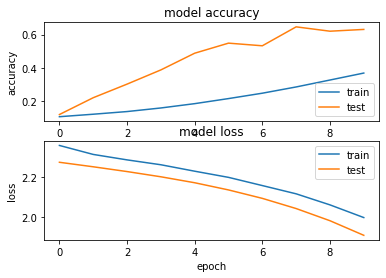

In [77]:
plt.subplot(2,1,1) 
plt.plot(hist.history['accuracy']) 
plt.plot(hist.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='lower right') 
 
plt.subplot(2,1,2) 
plt.plot(hist.history['loss']) 
plt.plot(hist.history['val_loss']) 
plt.title('model loss') 
plt.ylabel('loss') 
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper right') 
 
plt.show()